# *AFRL RTA Research Plotting Tool*

## Description
This notebook outlines a simple workflow for analyzing log files. This tool may be copied and modified to fit a variety of environment debugging and experiment visualization needs. This notebook relies on functions defined in plot_tool.py in order to consume log files and plot extracted data to a matplotlib pyplot Figure.

### Getting Started
Let's begin by importing some dependencies:

In [3]:
from plot_tool import *
from matplotlib import pyplot
import pandas as pd
import numpy as np

### Setting Visual Options
Here we set the backend of matplotlib to be compatible with Jupyter notebook and set the display settings for pandas tables to increase the limit of columns.

In [8]:
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", 500, "display.width", 500)

### Assigning Variables
Now we set the configuration of the analysis you wish to complete. In the cell below, specify the experiment log you wish to read by assigning the full path to the experiment directory to the ***path_to_experiment_dir*** variable. You will also want to specify the number of the worker whose log file you wish to read by assigning an integer to the ***worker_number*** variable. The ***blacklist*** should contain a list of strings. If the items in the ***blacklist*** correspond to any column names found within the log file, they will be omitted in each episode DataFrame.
Assign the ID of the episode you wish to plot data from to the ***episode_ID*** variable. *You might find it useful to run the cell for processing the log file and then displaying the metadata Dataframe to aid in your selection of episode ID.*

Assign the variables you wish to plot!
**x_label** is the name assigned to the x axis on the plot. 
**x_variable** is the title of the column of the episode DataFrame you wish to assign to the x axis.
**y_label** is the name assigned to the y axis on the plot. 
**y_variables** is a dictionary of ```{"legend_name_on_plot": "Dataframe_column_title"}``` KVPs, to allow the plotting of multiple variables on the same Figure.

In [34]:
# assign log variables
path_to_experiment_dir = "/home/john/AFRL/Dubins/have-deepsky/rejoin/output/expr_20210405_121409"
worker_number = 1
blacklist = ["obs", "time"]

# assign plot variables
episode_ID = 1334929157
x_label = "Steps"
x_variable = "step_number"
y_label = "Wingman Position"
y_variables = {"x": "info_wingman_x",
               "y": "info_wingman_y"}

### Reading Log File
This cell leverages the process_log() function from the plot_tool.py script to read historical RLLib experiments into memory. The logs are converted from jsonlines format, where each JSON object holds all the state data for a single timestep of a single training episode, to pandas Dataframes, where each row contains the state data for each timestep. These episode summary Dataframes are stored in an ```{ID: episode_DataFrame}``` dictionary named ***episode_dataframes***.

For browsing the set of episodes stored in the specified log file, a high level collection of meta data is constructed. This metadata Dataframe is stored in the ***metadata_dataframe*** variable and contains relevant information on episode duration and terminal state.

In [28]:
path_to_log_file = path_to_experiment_dir + "/training_logs/worker_" + str(worker_number) + ".log"
metadata_dataframe, episode_dataframes = process_log(path_to_log_file, blacklist)

log read time: 2.2024459838867188


### Display Metadata Table
This cell is responsible for displaying log file metadata. This is to facilitate experiment analysis and ease navigation of log files. You may simply print the entire metadata Dataframe object, or you may wish use one of the dedicated ```head()``` or ```tail()``` methods to reduce the size of the output. Simply uncomment and enter the number of rows you wish to view of the dataframe in the parenthesis of ```head()``` to view rows from the top of the table or ```tail()``` to view rows from the bottom.

In [29]:
metadata_dataframe.head(100)
# metadata_dataframe.tail(500)
# print(metadata_dataframe)

,worker_episode_number,episode_ID,episode_duration,episode_success,episode_failure
0,0,288545018,139,False,distance
1,10,965274705,206,False,distance
2,20,1794791897,305,False,distance
3,30,1549495423,400,False,distance
4,40,1394889710,216,False,distance
5,50,1133075550,420,False,distance
6,60,469828692,260,False,distance
7,70,1980384858,1000,False,timeout
8,80,714457467,1000,False,timeout
9,90,407699194,670,False,crash


### Display Available Variables
This next cell simply displays the episode variables that were read from the log file and are available for plotting. Reference this to check spelling and discover what plotting options are available!

In [40]:
print ('\n'.join(next(iter(episode_dataframes.values())).columns.values))

actions_0
actions_1
info_wingman_state_0
info_wingman_state_1
info_wingman_state_2
info_wingman_state_3
info_wingman_state_4
info_wingman_state_5
info_wingman_state_6
info_wingman_x
info_wingman_y
info_wingman_z
info_wingman_heading
info_wingman_gamma
info_wingman_roll
info_wingman_v
info_lead_state_0
info_lead_state_1
info_lead_state_2
info_lead_state_3
info_lead_state_4
info_lead_state_5
info_lead_state_6
info_lead_x
info_lead_y
info_lead_z
info_lead_heading
info_lead_gamma
info_lead_roll
info_lead_v
info_rejoin_region_x
info_rejoin_region_y
info_rejoin_region_z
info_rejoin_region_radius
info_rejoin_region_height
info_failure
info_success
info_status_rejoin_status
info_status_rejoin_prev_status
info_status_rejoin_time
info_status_rejoin_time_elapsed
info_status_rejoin_lead_distance
info_status_failure
info_status_success
info_reward_step
info_reward_component_totals_rejoin
info_reward_component_totals_rejoin_first_time
info_reward_component_totals_time
info_reward_component_totals_re

### Create a Plot
This cell is responsible for drawing the selected data onto a matplotlib Figure to create a plot. The specified episode is retreived, data corresponding to specified variables are extracted, and said data are assigned to their respective axes on the plot. *Note: blank plots may arrise from misspellings of variable names. Refer to the previous cell for a list of available episode variables.*

Text(0.5, 1.0, 'Episode 1334929157:\n Wingman Position vs. Steps')

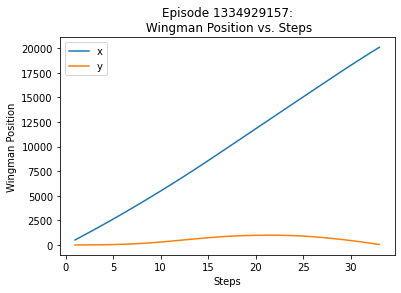

In [35]:
figure, axes = pyplot.subplots()

episode_dataframe = episode_dataframes[episode_ID]
x = []
y = {}
if x_variable in next(iter(episode_dataframes.values())).columns.values:
    x = episode_dataframe[x_variable]

for name, column in y_variables.items():
    if column in next(iter(episode_dataframes.values())).columns.values:
        y[name] = episode_dataframe[column]

plot(x, y, axes)

axes.set_xlabel(x_label)
axes.set_ylabel(y_label)
axes.legend(y.keys())
axes.set_title("Episode {}:\n {} vs. {}".format(episode_ID, y_label, x_label))

### Customize
Feel free to explore customized, complicated options, like plotting multiple subplots on the same Figure for side-by-side comparison or manipulating episode data to create custom values to plot! Leverage the flexibility of matplotlib, pandas, and Jupyter notebook to fully customize your analysis.

Text(0.5, 1.0, 'Episode 1334929157:\n Lead Position vs. Time')

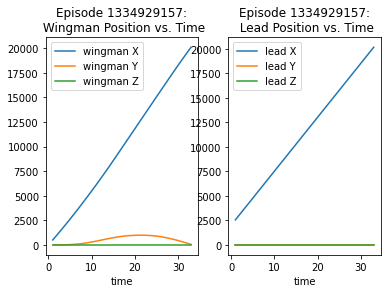

In [36]:
# create custom variables to arbitrarily control your analysis
time = episode_dataframe["step_number"] * episode_dataframe["info_timestep_size"]

# generate multiple axes objects for the same figure by passing arguments to the subplots() method
figure, axes = pyplot.subplots(1,2)

y1 = {"wingman X": episode_dataframe["info_wingman_x"],
                  "wingman Y": episode_dataframe["info_wingman_y"],
                 "wingman Z": episode_dataframe["info_wingman_z"],}
y2 = {"lead X": episode_dataframe["info_lead_x"],
                  "lead Y": episode_dataframe["info_lead_y"],
                 "lead Z": episode_dataframe["info_lead_z"]}

plot(time, y1, axes[0])
plot(time, y2, axes[1])

axes[0].set_xlabel("time")
axes[1].set_xlabel("time")
axes[0].legend(y1.keys())
axes[1].legend(y2.keys())
axes[0].set_title("Episode {}:\n Wingman Position vs. Time".format(episode_ID))
axes[1].set_title("Episode {}:\n Lead Position vs. Time".format(episode_ID))

Text(0.5, 1.0, 'Episode 1334929157:\n Wingman X Difference vs. Time')

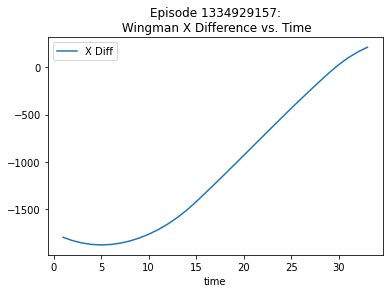

In [42]:
# create custom variables to arbitrarily control your analysis
episode_dataframe = episode_dataframes[episode_ID]
time = episode_dataframe["step_number"] * episode_dataframe["info_timestep_size"]

# generate multiple axes objects for the same figure by passing arguments to the subplots() method
figure, axes = pyplot.subplots()

y1 = {"X Diff": episode_dataframe["info_wingman_x"] - episode_dataframe["info_rejoin_region_x"],
                  }

plot(time, y1, axes)

axes.set_xlabel("time")
axes.legend(y1.keys())
axes.set_title("Episode {}:\n Wingman X Difference vs. Time".format(episode_ID))

Text(0.5, 1.0, 'Episode 1334929157:\n Wingman Y Difference vs. Time')

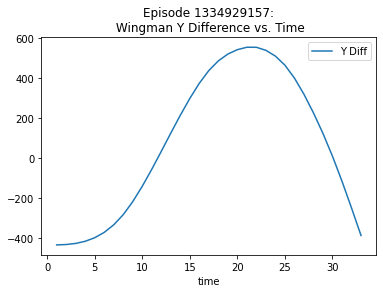

In [43]:
# create custom variables to arbitrarily control your analysis
episode_dataframe = episode_dataframes[episode_ID]
time = episode_dataframe["step_number"] * episode_dataframe["info_timestep_size"]

# generate multiple axes objects for the same figure by passing arguments to the subplots() method
figure, axes = pyplot.subplots()

y1 = {"Y Diff": episode_dataframe["info_wingman_y"] - episode_dataframe["info_rejoin_region_y"],
                  }

plot(time, y1, axes)

axes.set_xlabel("time")
axes.legend(y1.keys())
axes.set_title("Episode {}:\n Wingman Y Difference vs. Time".format(episode_ID))

Text(0.5, 1.0, 'Episode 1334929157:\n Wingman Z Difference vs. Time')

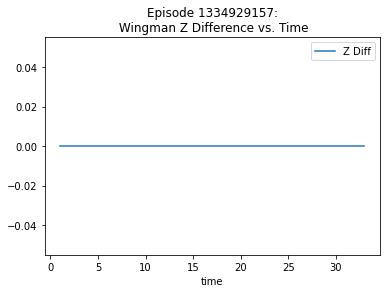

In [44]:
# create custom variables to arbitrarily control your analysis
episode_dataframe = episode_dataframes[episode_ID]
time = episode_dataframe["step_number"] * episode_dataframe["info_timestep_size"]

# generate multiple axes objects for the same figure by passing arguments to the subplots() method
figure, axes = pyplot.subplots()

y1 = {"Z Diff": episode_dataframe["info_wingman_z"] - episode_dataframe["info_rejoin_region_z"],
                  }

plot(time, y1, axes)

axes.set_xlabel("time")
axes.legend(y1.keys())
axes.set_title("Episode {}:\n Wingman Z Difference vs. Time".format(episode_ID))

Text(0.5, 1.0, 'Episode 1334929157:\n Wingman Actions vs. Time')

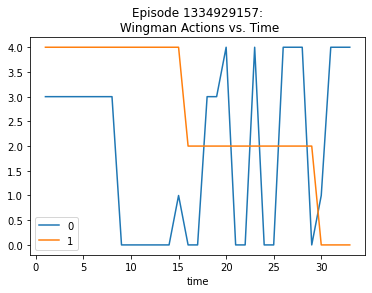

In [41]:
# create custom variables to arbitrarily control your analysis
episode_dataframe = episode_dataframes[episode_ID]
time = episode_dataframe["step_number"] * episode_dataframe["info_timestep_size"]

# generate multiple axes objects for the same figure by passing arguments to the subplots() method
figure, axes = pyplot.subplots()

y1 = {"0": episode_dataframe["actions_0"],
                  "1": episode_dataframe["actions_1"]}

plot(time, y1, axes)

axes.set_xlabel("time")
axes.legend(y1.keys())
axes.set_title("Episode {}:\n Wingman Actions vs. Time".format(episode_ID))